In [1]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import profile
import time

from profile import run
from itertools import permutations

%matplotlib inline

##### Nearest Neighbor Algorithm

In our initial approach, we chose to enumerate all of the routes for a given set of cities and then select the shortest one. Another approach we can take is to choose a random city as our starting point, and from there chose the next closest city. Repeat this until you have covered all points.

More on the NN Algorithm: <a href="https://en.wikipedia.org/wiki/Nearest_neighbour_algorithm">Wikipedia</a>

Code to display routes.

In [2]:
def make_cities(n, max_height=600, max_width=400, seed=1000):
    """Returns list of n cities (points) within a *max_height* by *max_width* 
    grid."""
    random.seed(n * seed)
    return [complex(random.randrange(max_height), random.randrange(max_width))
            for i in range(n)]


def plot_route(route):
    """Given a route, plots the route end to end."""
    plot_lines(list(route) + [route[0]])
    
    
def plot_lines(points, style='gs-', display=True):
    """Given a set of points, plots the points."""
    plt.plot([X(p) for p in points], [Y(p) for p in points], style)
    plt.axis('scaled'); plt.axis('off')
    if display: print('Route distance:', route_length(points))
        
        
def X(point): return point.real


def Y(point): return point.imag


def distance(A, B):
    """Returns the distance between two points."""
    return abs(A - B)


def route_length(route):
    """Returns the total length of a route."""
    return sum(distance(route[i], route[i-1]) for i, n in enumerate(route))

In [3]:
def nearest_neighbor(cities):
    """Chooses a random point in a given set of cities, and chooses a route
    by incrementally choosing the closest city to each point."""
    start = choose_random(cities)
    route = [start]
    cities.remove(start)
    
    for number_of_cities in range(len(cities)):
        closest = closest_city(route[-1], cities)
        route.append(closest)
        cities.remove(closest)
    
    return route


def choose_random(cities): return random.choice(cities)


def closest_city(city, cities): 
    """Returns the closest city in a set of cities."""
    return min(cities, key=lambda x: distance(x, city))

('Route distance:', 1480.8188030586537)
Wall time: 45 ms


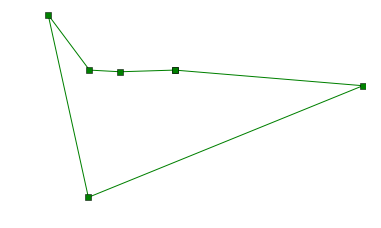

In [4]:
%time plot_route(nearest_neighbor(make_cities(6)))

Looks pretty good to me. This might actually be the optimal route for this scenario. Let's try with more cities to see if we continue to get the optimal route.

('Route distance:', 1200.2526165917152)
Wall time: 58 ms


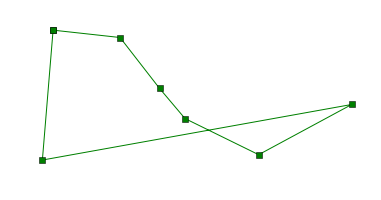

In [5]:
%time plot_route(nearest_neighbor(make_cities(7)))

That looks less optimal... Let's try a few more.

('Route distance:', 1424.4682505736164)
Wall time: 75 ms


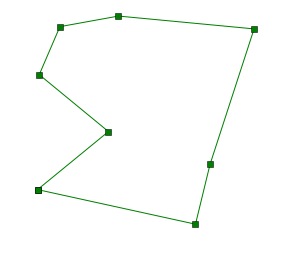

In [6]:
%time plot_route(nearest_neighbor(make_cities(8)))

('Route distance:', 1296.8202982138391)
Wall time: 65 ms


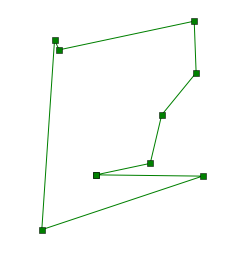

In [7]:
%time plot_route(nearest_neighbor(make_cities(9)))

('Route distance:', 2142.2618013013025)
Wall time: 52 ms


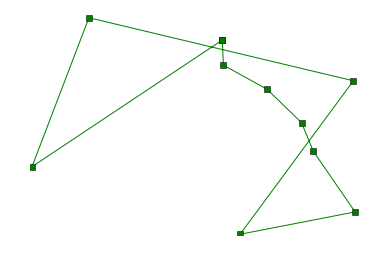

In [8]:
%time plot_route(nearest_neighbor(make_cities(10)))

It looks like the nearest neighbor algorithm returns a less than optimal solution in some scenarios, but it was able to complete the 10 city problem in roughly the same amount of time  (100ms) as it took on the 6 city problem - that's much better than the brute force timing! Let's test with more cities.

('Route distance:', 2425.8539208384977)
Wall time: 55 ms


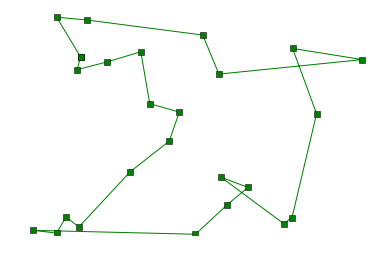

In [9]:
%time plot_route(nearest_neighbor(make_cities(25)))

('Route distance:', 3522.2472561057307)
Wall time: 103 ms


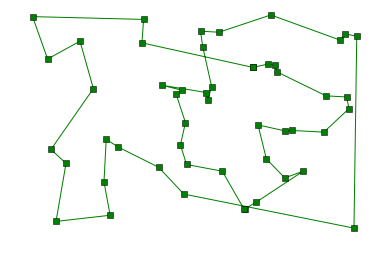

In [10]:
%time plot_route(nearest_neighbor(make_cities(50)))

('Route distance:', 4731.761886122623)
Wall time: 58 ms


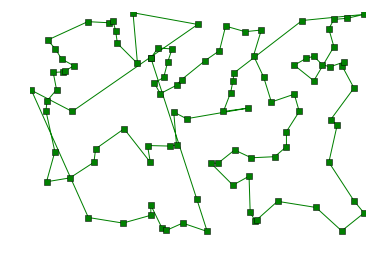

In [11]:
%time plot_route(nearest_neighbor(make_cities(100)))

Less than 1-tenth of a second for 100 cities! Let's compare that to how long we would expect the brute force approach to take...

In [12]:
def predict(n):
    """Predicts time to brute force TS problem for :n: cities."""
    fact_n = reduce(lambda x, y: x*y, range(1, n+1))
    fact_10 = reduce(lambda x, y: x*y, range(1, 11))
    time_for_10_cities = 18.6
    return fact_n / fact_10 * time_for_10_cities

predict(100)

4.783585778376767e+152

For perspective, the brute force approach would take roughly 1.5 x 10^151 years to complete - way more time than we have this afternoon. 

While not perfect, the NN algorithm allows us to get result sets for large number of cities where it would take aeons for the brute force approach to complete. Let's see if we have more success with other types of algorithms.